# IRWA PROJECT PART 1
Laia Tomàs Jané u198723\
Quim Ribas Martinez u198742 

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import numpy as np

In [2]:
#read dataset to a dataframe
df = pd.read_json('fashion_products_dataset.json')

In [3]:
df.head(3)

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...


## PART 1: DATA PREPARATION

##### 1. As a first step, you must pre-process the documents. In particular, for the text fields (title, description) you should:
● Removing stop words
● Tokenization
● Removing punctuation marks
● Stemming
● and... anything else you think it's needed (bonus point)

In [4]:
def build_terms(text):

    #check that the text is a string
    if not isinstance(text, str):
        return []

    #keep only any word character or spaces (remove special characters and numbers) (includes removing punctuation marks)
    text = re.sub(r'[^a-z\s]', '', text.lower()) 

    #tokenize text to a list of tokens
    tokens = text.split()

    #remove stop words
    stop_words = set(stopwords.words('english'))
    text = [word for word in tokens if word not in stop_words and len(word) > 2] #keep only words of length 3 minimum

    #apply stemming
    stemmer = PorterStemmer()
    text=[stemmer.stem(word) for word in text]

    return text

Examples of usage of build_terms function

In [5]:
build_terms('Solid Women Black Sports Shorts ')

['solid', 'women', 'black', 'sport', 'short']

Apply build_terms to text fields (title and description)

In [6]:
#apply cleaning text function to the title and description columns and store it in new columns for not losing original information when querying
df['title_clean'] = df['title'].apply(build_terms)
df['description_clean'] = df['description'].apply(build_terms)

Examples of title and description text cleaning

In [7]:
#examples
print('title before processing:', df['title'].iloc[1200], "\ntitle after processing:", df['title_clean'].iloc[1200])
print('\ntitle before processing:', df['title'].iloc[2290], "\ntitle after processing:", df['title_clean'].iloc[2290])

title before processing: Solid Men Polo Neck Light Green T-Shirt 
title after processing: ['solid', 'men', 'polo', 'neck', 'light', 'green', 'tshirt']

title before processing: Solid Women Black Sports Shorts 
title after processing: ['solid', 'women', 'black', 'sport', 'short']


In [8]:
#examples
print('description before processing:', df['description'].iloc[1900], "\ndescription after processing:", df['description_clean'].iloc[1900])
print('\ndescription before processing:', df['description'].iloc[2290], "\ndescription after processing:", df['description_clean'].iloc[2290])

description before processing: Get after those extra reps. This women's t-shirt is designed to keep you dry and comfortable on AMRAPs, ladders or any other sweat-heavy CrossFit WODs. The slim-fitting tee is made of moisture-wicking jersey fabric. The batwing silhouette gives you extra room to move on kipping pull-ups and kettlebell swings. It features CrossFit graphics on the front and back. 
description after processing: ['get', 'extra', 'rep', 'women', 'tshirt', 'design', 'keep', 'dri', 'comfort', 'amrap', 'ladder', 'sweatheavi', 'crossfit', 'wod', 'slimfit', 'tee', 'made', 'moisturewick', 'jersey', 'fabric', 'batw', 'silhouett', 'give', 'extra', 'room', 'move', 'kip', 'pullup', 'kettlebel', 'swing', 'featur', 'crossfit', 'graphic', 'front', 'back']

description before processing: RE 7 INCH SHORT -WG 
description after processing: ['inch', 'short']


In [9]:
#examples
print('description before processing:', df['description'].iloc[1201], "\ndescription after processing:", df['description_clean'].iloc[1201])
print('\ndescription before processing:', df['description'].iloc[2293], "\ndescription after processing:", df['description_clean'].iloc[2293])

description before processing: Grab the latest collection on T-Shirt for Women by CLODZ. Clodz bring you latest fashion in T-Shirt for you to be comfortable in style. FABRIC: We provide you best quality fabric giving you 100% pure cotton for showing off your personality. SLEEVE TYPE: These t-shirt is half sleeve for you to be more comfortable in this hot summer. STYLE: These t-shirts are having digital printing with unique designs for you to look more cool and stylish as ever. These t-shirts are best for Summers. 
description after processing: ['grab', 'latest', 'collect', 'tshirt', 'women', 'clodz', 'clodz', 'bring', 'latest', 'fashion', 'tshirt', 'comfort', 'style', 'fabric', 'provid', 'best', 'qualiti', 'fabric', 'give', 'pure', 'cotton', 'show', 'person', 'sleev', 'type', 'tshirt', 'half', 'sleev', 'comfort', 'hot', 'summer', 'style', 'tshirt', 'digit', 'print', 'uniqu', 'design', 'look', 'cool', 'stylish', 'ever', 'tshirt', 'best', 'summer']

description before processing: TS Arch

check all columns available

In [10]:
output_columns = ["pid", "title", "description", "brand", "category", "sub_category", "product_details", "seller", "out_of_stock", "selling_price", "discount", "actual_price", "average_rating", "url"]

In [11]:
for column in output_columns:
    if column not in df.columns:
        print("Missing column ", column)

Hint 1

In [12]:
query1 = ['women full sleeve sweatshirt cotton']
query2 = ['men slim jeans blue']

In [13]:
build_terms(query2[0])

['men', 'slim', 'jean', 'blue']

In [14]:
validation_df = pd.read_csv('validation_labels.csv')

In [15]:
validation_df.head()

,title,pid,query_id,labels
0,Full Sleeve Printed Women Sweatshirt,SWSFFVKBCQG5FHPF,1,1
1,Full Sleeve Striped Women Sweatshirt,SWSFJY5ZFHQ7HXKW,1,0
2,Full Sleeve Printed Women Sweatshirt,SWSFUY89NHMZHZPX,1,1
3,Full Sleeve Graphic Print Women Sweatshirt,SWSFXQ5YX6RZKHP4,1,1
4,Full Sleeve Solid Women Sweatshirt,JCKFTZBC3DMCVYXH,1,0


In [16]:
#check the format of the values
print(df['discount'].unique())

['69% off' '66% off' '68% off' '74% off' '63% off' '67% off' '64% off'
 '76% off' '49% off' '61% off' '48% off' '70% off' '71% off' '29% off'
 '79% off' '73% off' '80% off' '81% off' '72% off' '77% off' '82% off'
 '84% off' '54% off' '83% off' '78% off' '22% off' '47% off' '35% off'
 '56% off' '75% off' '62% off' '60% off' '51% off' '44% off' '33% off'
 '50% off' '25% off' '28% off' '45% off' '53% off' '40% off' '52% off'
 '30% off' '57% off' '42% off' '65% off' '59% off' '55% off' '58% off'
 '46% off' '41% off' '34% off' '43% off' '38% off' '39% off' '86% off'
 '87% off' '12% off' '37% off' '5% off' '31% off' '24% off' '27% off'
 '32% off' '4% off' '' '23% off' '20% off' '9% off' '36% off' '21% off'
 '1% off' '10% off' '17% off' '8% off' '6% off' '2% off' '15% off'
 '3% off' '11% off' '16% off' '7% off' '18% off' '14% off' '26% off'
 '13% off' '19% off' '85% off']


In [17]:
def clean_discount(text):
    
    #ensure it's a string
    if not isinstance(text, str):
        return None

    text = text.split('%')[0] #keep text before %
    if text == '':
        return None
    return int(text) #convert to integer

In [18]:
clean_discount('93% off')

93

In [19]:
#apply to discount column
df['discount_clean'] = df['discount'].apply(clean_discount)

check column type of column out_of_stock

In [20]:
print(df['out_of_stock'].dtype)

bool


In [21]:
#new column in case we need 0s and 1s in the future
df['out_of_stock_int'] = df['out_of_stock'].astype(int)

check type of columns selling_price, actual_price and average_rating

In [22]:
df['selling_price'].dtype

dtype('O')

In [23]:
df['actual_price'].dtype

dtype('O')

In [24]:
df['average_rating'].dtype

dtype('O')

convert the object types to numeric values for filtering in the future

In [25]:
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [26]:
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

In [27]:
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

In [28]:
df.to_json("fashion_products_dataset_processed.json")

## PART2

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [175]:
df.info()
df[['actual_price', 'selling_price', 'discount_clean', 'average_rating']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   _id                28080 non-null  object        
 1   actual_price       11946 non-null  float64       
 2   average_rating     25819 non-null  float64       
 3   brand              28080 non-null  object        
 4   category           28080 non-null  object        
 5   crawled_at         28080 non-null  datetime64[ns]
 6   description        28080 non-null  object        
 7   discount           28080 non-null  object        
 8   images             28080 non-null  object        
 9   out_of_stock       28080 non-null  bool          
 10  pid                28080 non-null  object        
 11  product_details    28080 non-null  object        
 12  seller             28080 non-null  object        
 13  selling_price      23967 non-null  float64       
 14  sub_ca

,actual_price,selling_price,discount_clean,average_rating
count,11946.000000,23967.000000,27225.000000,25819.000000
mean,791.850326,535.425627,50.256896,3.627724
std,190.039099,211.762603,16.887287,0.663429
min,150.000000,99.000000,1.000000,1.000000
25%,629.000000,359.000000,40.000000,3.200000
50%,799.000000,499.000000,53.000000,3.800000
75%,999.000000,699.000000,63.000000,4.100000
max,999.000000,999.000000,87.000000,5.000000


In [176]:
#check duplicated products?
df_dups = df[df.duplicated(subset=['pid'])]
df_dups
#no dup rows

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,...,product_details,seller,selling_price,sub_category,title,url,title_clean,description_clean,discount_clean,out_of_stock_int


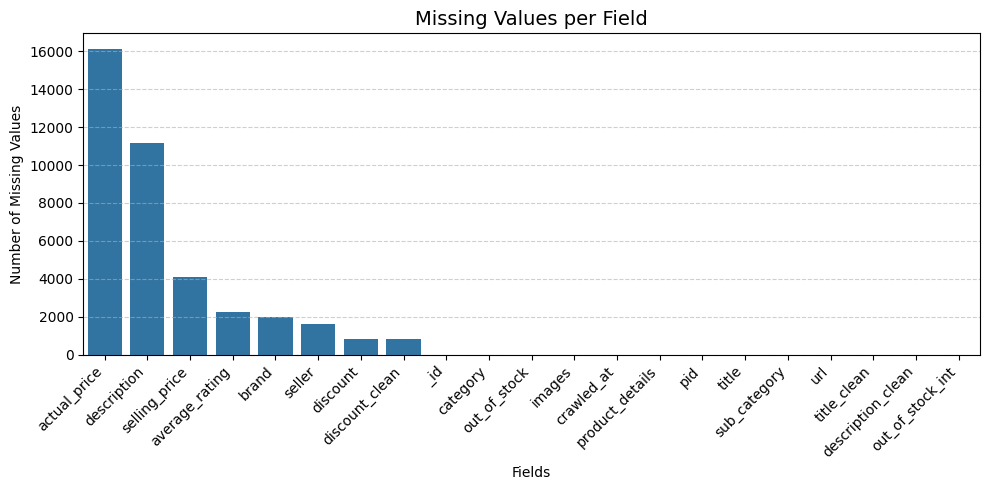

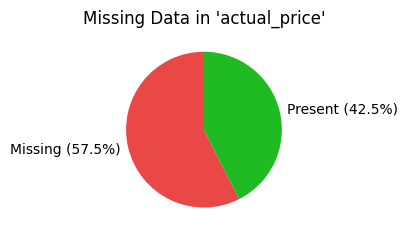

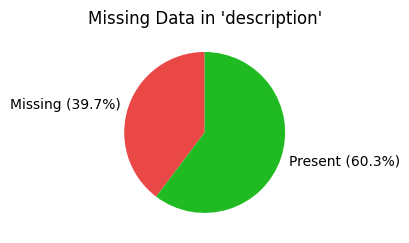

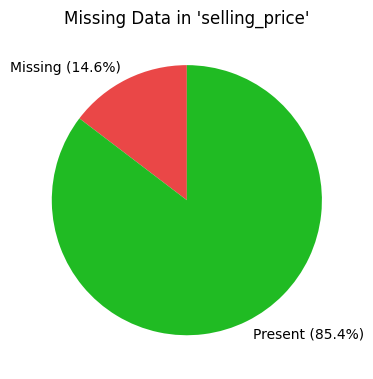

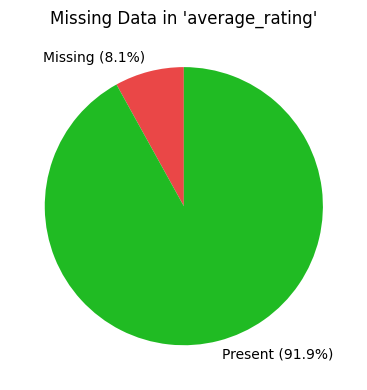

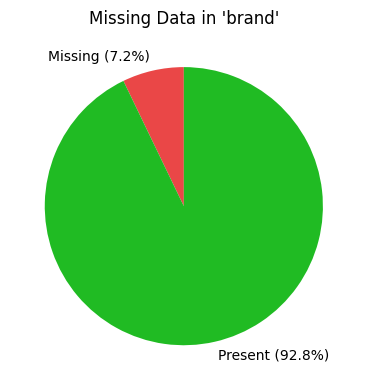

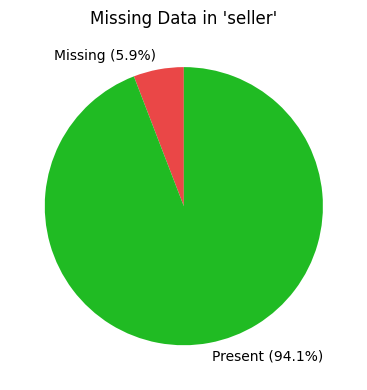

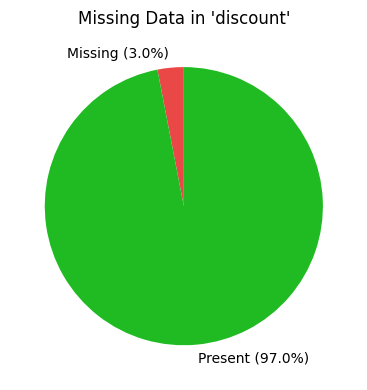

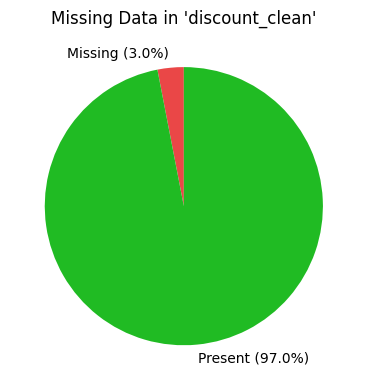

In [177]:
missing_counts = df.replace('', np.nan).isnull().sum().sort_values(ascending=False) #for take into account empty text fields, replace as nan

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.title("Missing Values per Field", fontsize=14)
plt.ylabel("Number of Missing Values")
plt.xlabel("Fields")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


missing_counts = missing_counts[missing_counts > 0]  # keep only those with missing values for plotting pie chart
for col in missing_counts.index:
    total = len(df)
    missing = missing_counts[col]
    present = total - missing
    missing_pct = (missing / total) * 100

    plt.figure(figsize=(4, 4))
    plt.pie(
        [missing, present],
        labels=[f'Missing ({missing_pct:.1f}%)', f'Present ({100 - missing_pct:.1f}%)'],
        colors=["#ea4747","#20bb23"],
        startangle=90,
    )
    plt.title(f"Missing Data in '{col}'", fontsize=12)
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

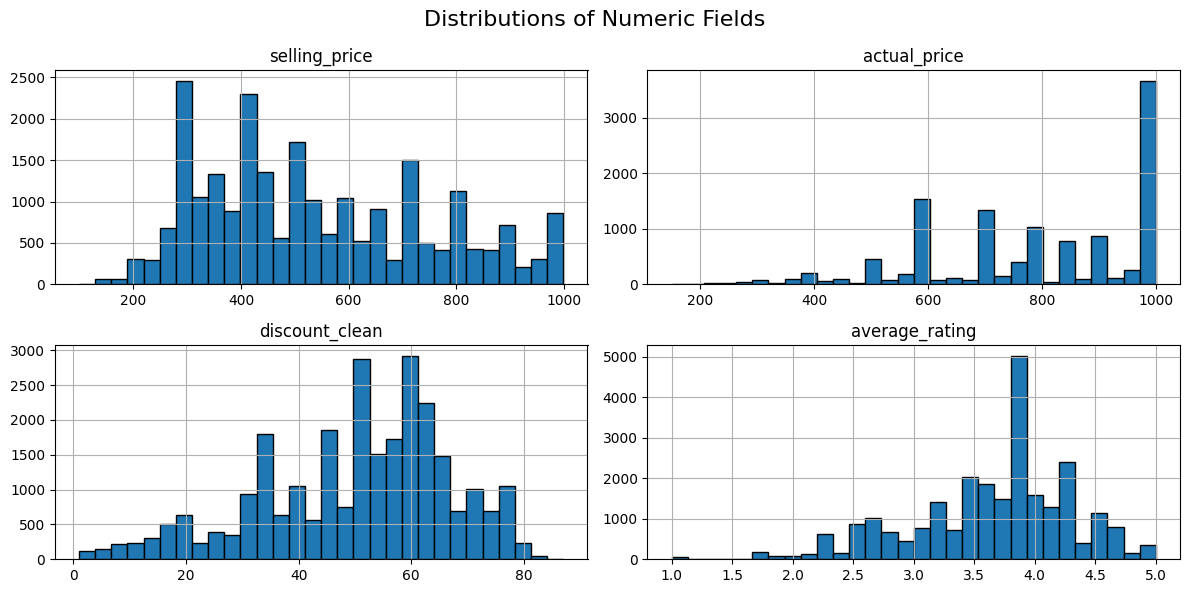

<Figure size 1000x500 with 0 Axes>

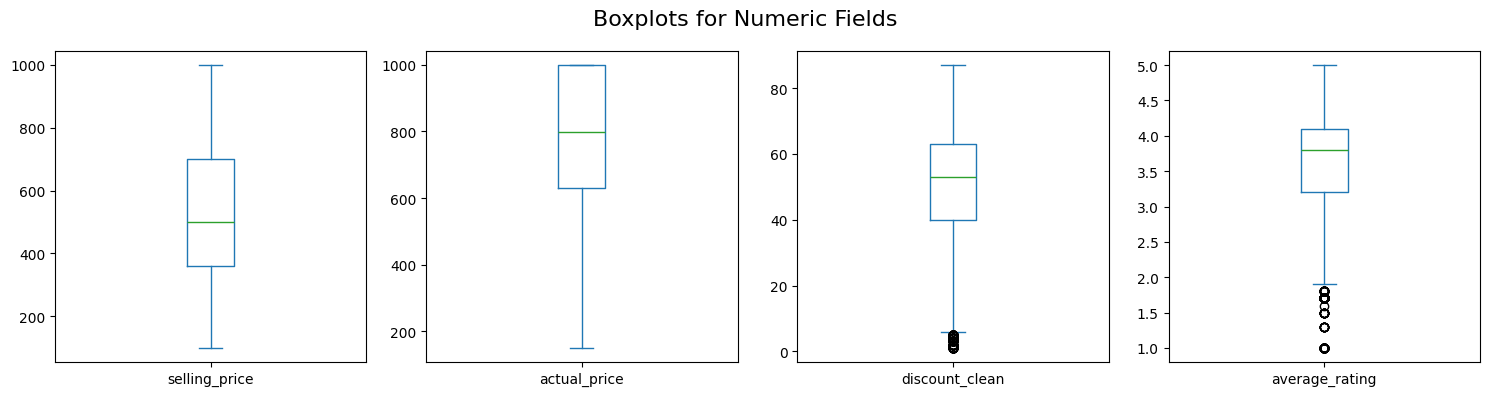

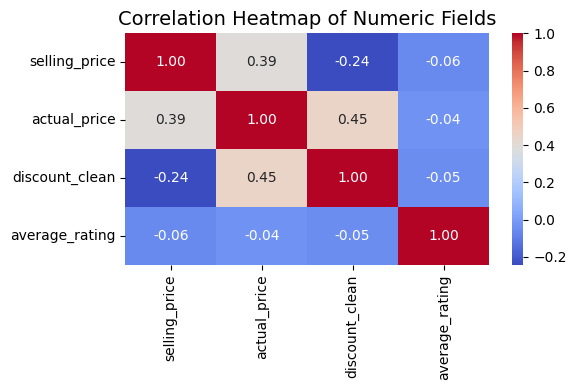

In [178]:
#select numeric columns
numeric_cols = ['selling_price', 'actual_price', 'discount_clean', 'average_rating']

plt.figure(figsize=(12, 6))
df[numeric_cols].hist(bins=30, figsize=(12, 6), edgecolor='black')
plt.suptitle("Distributions of Numeric Fields", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df[numeric_cols].plot(kind='box', subplots=True, layout=(1, 4), figsize=(15, 4), sharey=False)
plt.suptitle("Boxplots for Numeric Fields", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Fields", fontsize=14)
plt.tight_layout()
plt.show()

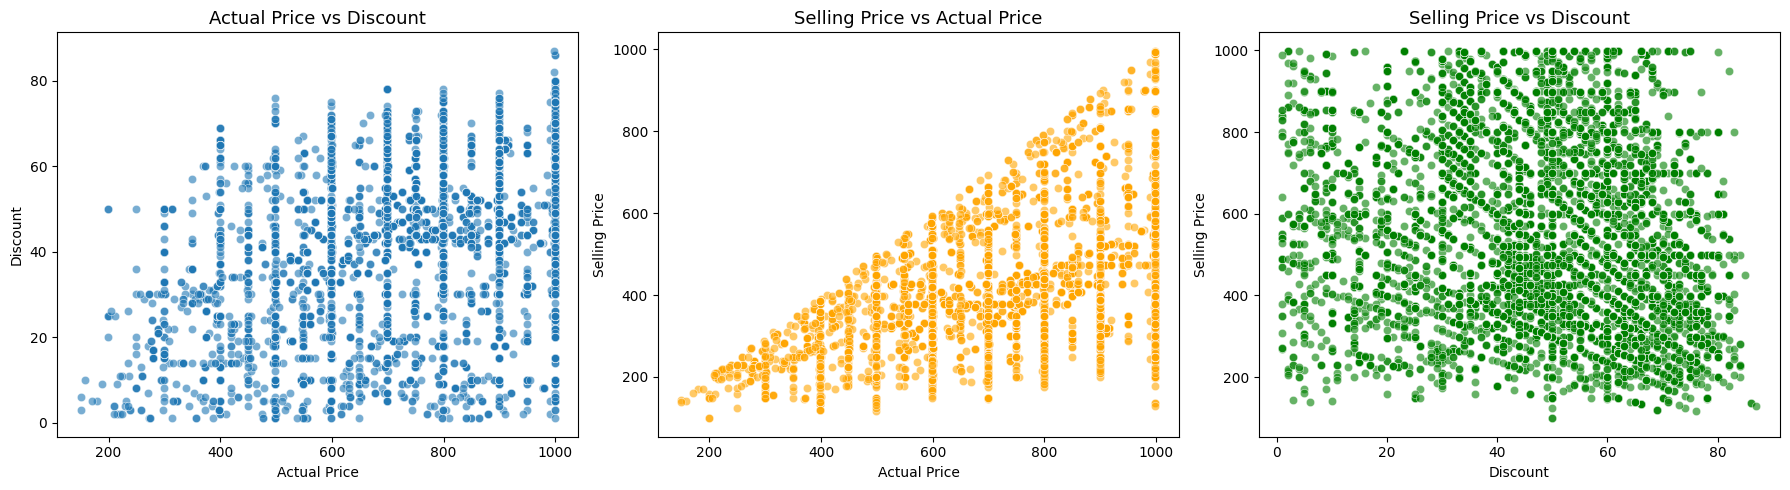

In [179]:
#further analyze the highest absolute correlation scores
plt.figure(figsize=(18, 5))  

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='actual_price', y='discount_clean', alpha=0.6)
plt.title('Actual Price vs Discount', fontsize=13)
plt.xlabel('Actual Price')
plt.ylabel('Discount')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='actual_price', y='selling_price', alpha=0.6, color='orange')
plt.title('Selling Price vs Actual Price', fontsize=13)
plt.xlabel('Actual Price')
plt.ylabel('Selling Price')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='discount_clean', y='selling_price', alpha=0.6, color='green')
plt.title('Selling Price vs Discount', fontsize=13)
plt.xlabel('Discount')
plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

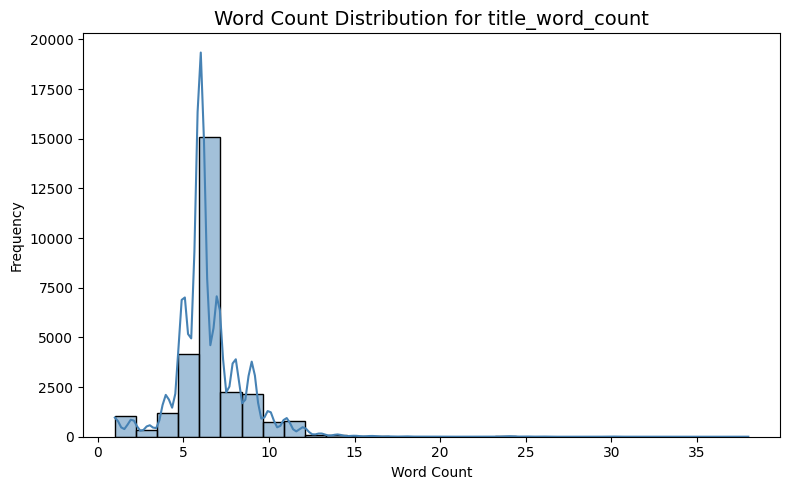

title_word_count - Average sentence length: 6.46
title_word_count - Median sentence length: 6.00


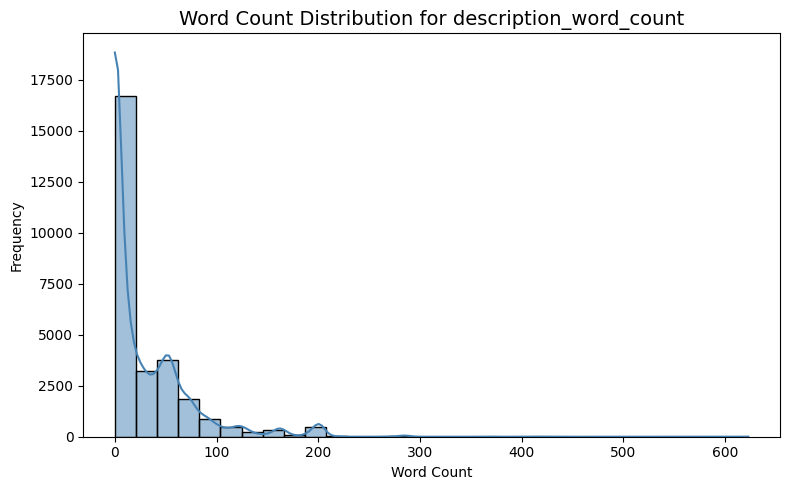

description_word_count - Average sentence length: 29.77
description_word_count - Median sentence length: 10.00


In [180]:
df['title_word_count'] = df['title'].fillna('').apply(lambda x: len(x.split()))
df['description_word_count'] = df['description'].fillna('').apply(lambda x: len(x.split()))

for col in ['title_word_count', 'description_word_count']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(f'Word Count Distribution for {col}', fontsize=14)
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    print(f"{col} - Average sentence length: {df[col].mean():.2f}")
    print(f"{col} - Median sentence length: {df[col].median():.2f}")


In [181]:
all_tokens_titles = [token for tokens in df['title_clean'] for token in tokens]
vocab_titles = set(all_tokens_titles)

all_tokens_desc = [token for tokens in df['description_clean'] for token in tokens]
vocab_desc = set(all_tokens_desc)

print("Vocabulary size of titles:", len(vocab_titles))
print("Vocabulary size of descriptions:", len(vocab_desc))


Vocabulary size of titles: 623
Vocabulary size of descriptions: 5493


In [182]:
top_rated = df.sort_values('average_rating', ascending=False).head(10)
top_rated[['pid', 'title', 'brand', 'average_rating']]

,pid,title,brand,average_rating
27767,TSHFFEYSD558XVRZ,Solid Women Round Neck Blue T-Shirt,Oka,5.0
12332,TSHFHFTVBWCGWZFF,Printed Women Hooded Neck Black T-Shirt,ATTIITU,5.0
12279,TSHFHFTVBFQHQGC9,Printed Women Hooded Neck Grey T-Shirt,ATTIITU,5.0
23852,TSHF5PT8KQARH2N3,Graphic Print Men Round Neck Blue T-Shirt,Free Authori,5.0
12235,TSHFCWYJ2ZXU6GMN,"Solid Women Round Neck White, Black T-Shirt",ATTIITU,5.0
12242,VESFKGD9Y5EXQKHK,ATTIITUDE Men Vest,,5.0
12243,VESFKGDNFEGK8VVC,ATTIITUDE Men Vest,,5.0
8477,TRKFUYGVY986HWBT,Women Trunks,V,5.0
1923,TKPFZ3JRDSRDZSEY,Self Design Women Black Track Pants,REEB,5.0
18049,TSHFKZUQNFGATATN,Printed Women Round Neck White T-Shirt,yellowvib,5.0


In [183]:
top_discounted = df.sort_values('discount_clean', ascending=False).head(10)
top_discounted[['pid', 'title', 'brand', 'discount_clean']]

,pid,title,brand,discount_clean
906,TSHF5FRXKGF6A4FH,Printed Women Round Neck White T-Shirt,Jack Roy,87.0
902,TSHFMFXGFJ7G2ABK,Printed Women Round Neck Grey T-Shirt,Jack Roy,86.0
903,TSHFMFT7VASAHBH3,Printed Women Round Neck White T-Shirt,Jack Roy,86.0
18249,TSHFGH6T3CVGDXS9,Printed Men Round Neck Multicolor T-Shirt (Pa...,yellowvib,85.0
9813,CAPE9YWMURE4FKAJ,Solid Balclava Cap,Gracew,84.0
91,CTPFVZTBN4GRZKXH,nu-Lite Satin Tie & Cufflink (Red),,84.0
18093,TSHFGFNBYVKZBQ2M,Printed Men Collared Neck Multicolor T-Shirt,yellowvib,84.0
520,TSHEYQ73AFZZ4QHX,"Printed Women Round or Crew Black, Grey T-Shirt",Fairdea,84.0
18016,TSHFHQNCHJJUQYVQ,Printed Women Round Neck Blue T-Shirt,yellowvib,84.0
18017,TSHFKHRYJYMEMZHK,Printed Men Mandarin Collar Blue T-Shirt,yellowvib,84.0


In [184]:
top_cheap = df.sort_values('actual_price', ascending=False).head(10)
top_cheap[['pid', 'title', 'brand', 'actual_price']]

,pid,title,brand,actual_price
28025,TSHFVZB9JRMVGZBY,Solid Men Round Neck Orange T-Shirt,Oka,999.0
28023,TSHFDG367YT6GJ2F,Printed Women Round Neck Multicolor T-Shirt,Oka,999.0
28022,TSHFDG36JAYRGSCS,Printed Men Round Neck Grey T-Shirt,Oka,999.0
13531,TSHFVHGCP3G245DS,Printed Men Henley Neck Grey T-Shirt,Marca Disa,999.0
13581,TSHFVJ3MK8UBK39F,Printed Women Collared Neck Black T-Shirt,Marca Disa,999.0
13576,TSHFV3BFYMTYDYYF,Printed Women Round Neck Black T-Shirt,Marca Disa,999.0
13573,TSHFVJ4462GRSQHZ,Striped Women Collared Neck Blue T-Shirt,Marca Disa,999.0
13622,TSHFV3B3VBJGRV5S,Printed Men Round Neck Blue T-Shirt,Marca Disa,999.0
13621,TSHFV3B3DE2RKAGP,Printed Men Round Neck White T-Shirt,Marca Disa,999.0
28019,TSHFDG365DHUPRHR,Printed Women Round Neck Green T-Shirt,Oka,999.0


In [185]:
top_cheap = df.sort_values('actual_price', ascending=True).head(10)
top_cheap[['pid', 'title', 'brand', 'actual_price']]

,pid,title,brand,actual_price
8068,VESFRGGT2YVHFZUA,VIP Men Vest (Pack of 2),,150.0
25222,VESFR8HYDSUEVFTZ,TOM BURG Men Vest,,150.0
8343,VESFRGHZCGZGPZ6X,VIP Men Vest (Pack of 2),,158.0
25199,VESFR7YMQFHJYRUU,TOM BURG Men Vest,,170.0
18907,CAPEZMP8QUJZGGXN,slouchy beanie Cap (Pack of 2),Thug Li,179.0
18908,CAPEM4X5EX7PDSGZ,NY HIphop Snapback Cap,Thug Li,188.0
8568,TRKFP6Z8C6ZHG9GQ,Women Trunks,V,199.0
20435,BDAFUBD2EJHFCRNC,Men Printed Bandana,T10 Spor,199.0
16481,SOCEVUBQCGFJ3CYR,Women Peds/Footie/No-Show,Welwe,199.0
16485,SOCET7QRNHYG9HHB,Women Mid-Calf/Crew (Pack of 2),Welwe,199.0


In [186]:
top_expensive = df.sort_values('selling_price', ascending=False).head(10)
top_expensive[['pid', 'title', 'brand', 'selling_price']]

,pid,title,brand,selling_price
22151,JCKFM3Y6S6QGYGV3,Sleeveless Solid Men Casual Jacket,EverLa,999.0
22150,JCKFM3Y6UXKW58GM,Sleeveless Color Block Women Casual Jacket,EverLa,999.0
22148,JCKFM3Y6GXWVYGV5,Sleeveless Solid Women Casual Jacket,EverLa,999.0
22147,JCKFM3Y6HSFYAVXY,Sleeveless Colorblock Women Padded Jacket,EverLa,999.0
22144,JCKFM3Y6XGGH53FS,Sleeveless Colorblock Men Padded Jacket,EverLa,999.0
22143,JCKFM3Y6XG38YFWT,Sleeveless Colorblock Women Padded Jacket,EverLa,999.0
22142,JCKFM3Y6MGUTFWN3,Sleeveless Solid Men Casual Jacket,EverLa,999.0
22570,SWSFYD7VNDXZEWZJ,Full Sleeve Solid Women Sweatshirt,RELIEF ZO,999.0
22566,SWSFYD7VS6H4SHQS,Full Sleeve Solid Men Sweatshirt,RELIEF ZO,999.0
22563,SWSFYD7VVQVBKWCN,Full Sleeve Solid Women Sweatshirt,RELIEF ZO,999.0


In [187]:
top_cheap = df.sort_values('selling_price', ascending=True).head(10)
top_cheap[['pid', 'title', 'brand', 'selling_price']]

,pid,title,brand,selling_price
20435,BDAFUBD2EJHFCRNC,Men Printed Bandana,T10 Spor,99.0
16485,SOCET7QRNHYG9HHB,Women Mid-Calf/Crew (Pack of 2),Welwe,99.0
7654,SOCFFGA2FYZQBFXT,Women Color Block Ankle Length (Pack of 3),your shopping sto,118.0
24439,SOCFZ7JX39ZEW8GE,Women Solid Ankle Length (Pack of 3),ina gro,120.0
24437,SOCFZAGJC3VUFQU9,Women Solid Ankle Length (Pack of 3),ina gro,120.0
24438,SOCFZ7GFAZGYZGR7,Men Solid Ankle Length (Pack of 3),ina gro,120.0
20253,CAPEX5YHPH3MSGFC,Cotton 5 panel baseball Cap,T10 Spor,124.0
16402,SUSECSFFVNKG5VGG,Brand Trunk Y- Back Suspenders for Men (Black),,125.0
906,TSHF5FRXKGF6A4FH,Printed Women Round Neck White T-Shirt,Jack Roy,128.0
25325,SOCFPR9UF8Q4FCHG,Men Ankle Length (Pack of 3),Pu,132.0


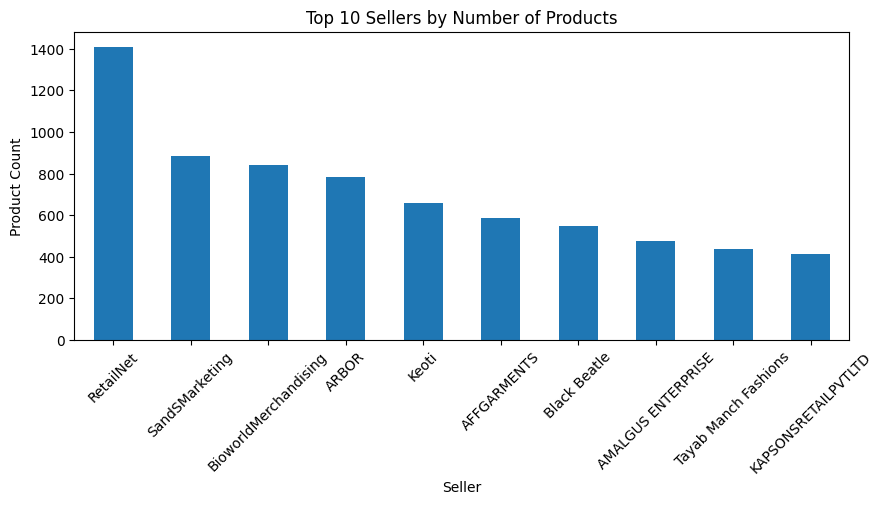

In [188]:
top_sellers = df[df['seller']!='']['seller'].value_counts().head(10)
top_sellers.plot(kind='bar', figsize=(10,4))
plt.title('Top 10 Sellers by Number of Products')
plt.xlabel('Seller')
plt.xticks(rotation=45)
plt.ylabel('Product Count')
plt.show()

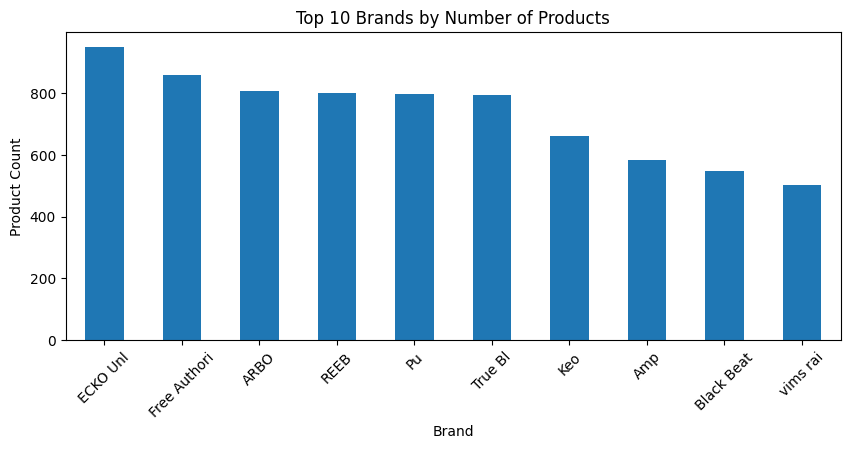

In [189]:
top_brands = df[df['brand']!='']['brand'].value_counts().head(10)
top_brands.plot(kind='bar', figsize=(10,4))
plt.title('Top 10 Brands by Number of Products')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.ylabel('Product Count')
plt.show()

In [190]:
brand_avg_price = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False)

top_brands_by_price = brand_avg_price.head(10)
print(top_brands_by_price)


brand
Elegant Appar         999.000000
TimeO                 995.000000
Fuel Clothi           986.407407
EverLa                975.000000
adidas Origina        968.666667
DiscountZila Fashi    965.058824
Asa                   948.000000
shiwam ethn           924.000000
YOGA                  923.166667
A                     917.250000
Name: selling_price, dtype: float64


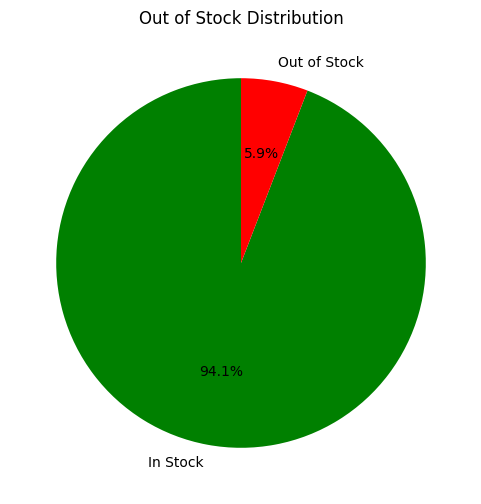

In [191]:
counts = df['out_of_stock'].value_counts()
labels = ['In Stock', 'Out of Stock'] 
colors = ['green', 'red']

plt.figure(figsize=(6,6))
plt.pie(
    counts, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%',  
    startangle=90,     
)
plt.title('Out of Stock Distribution')
plt.show()


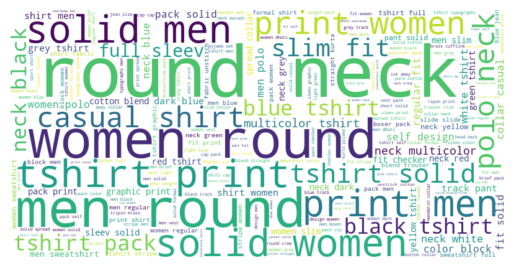

In [192]:
text = ' '.join([' '.join(tokens) for tokens in df['title_clean']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

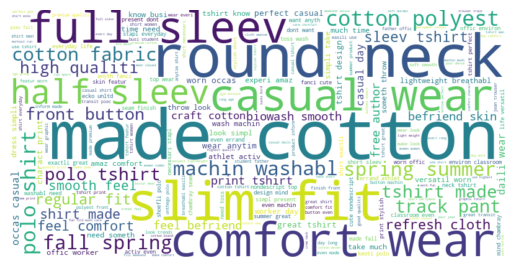

In [193]:
text = ' '.join([' '.join(tokens) for tokens in df['description_clean']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NER

In [136]:
import spacy
nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['entities_desc'] = df['description'].apply(extract_entities)
df['entities_title'] = df['title'].apply(extract_entities)


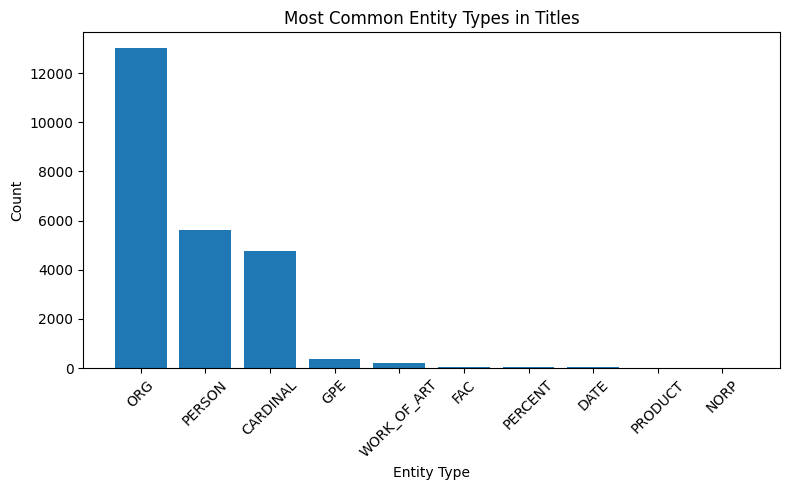

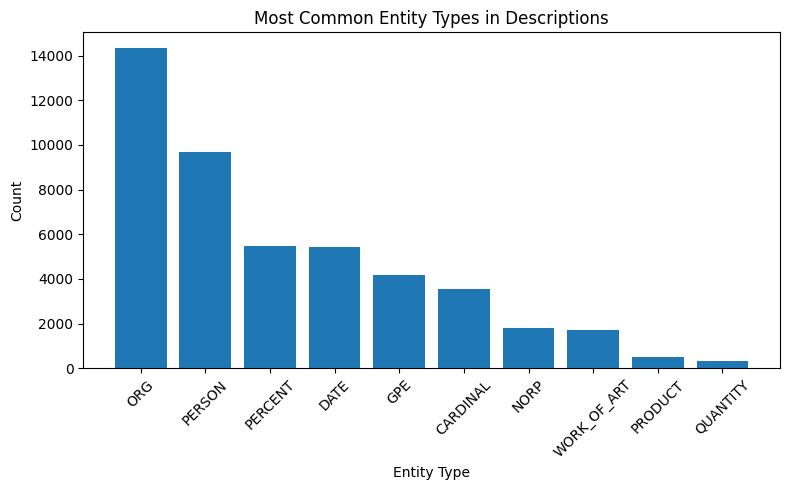

In [142]:
from collections import Counter

def plot_entity_types(entity_list, field_name):
    label_counts = Counter([ent[1] for ent in entity_list])
    
    top_labels = label_counts.most_common(10)
    labels, counts = zip(*top_labels)
    
    plt.figure(figsize=(8,5))
    plt.bar(labels, counts)
    plt.title(f"Most Common Entity Types in {field_name}")
    plt.xlabel("Entity Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

entities_title_flat = [ent for ents in df['entities_title'] for ent in ents]
entities_desc_flat = [ent for ents in df['entities_desc'] for ent in ents]

plot_entity_types(entities_title_flat, "Titles")
plot_entity_types(entities_desc_flat, "Descriptions")
